<a href="https://colab.research.google.com/github/rupasawant95/Airbnb-booking-analysis/blob/main/Airbnb_EDA_Capstone_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> What Is Airbnb ?

## <b> Airbnb is an online marketplace that connects people who want to rent out their homes with people looking for accommodations in that locale. NYC is the most populous city in the United States, and one of the most popular tourism and business places globally.

## <b> Our objective in this Analysis :

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## <b> Importing The Libraries 

In [ ]:
#importing necessary libraries for the dataset analysis
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

## <b> Mount The Drive

In [ ]:
#Mount the drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Import The Dataset

In [ ]:
#Read the AIRBNB NYC 2019 dataset 
path = "/content/drive/MyDrive/Airbnb NYC 2019 (1).csv"
df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019 (1).csv' )

## <b> Analyzing The Data

In [ ]:
#check the number of rows and columns in the dataset
df.shape

(48895, 16)

In [ ]:
#find the columns and datatypes in the dataset
df.info()

In [ ]:
#Toatl Number of elements in the dataset
df.size

782320

In [ ]:
#check if the id is unique or not
df['id'].nunique()

48895

In [ ]:
#types of room available
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
#Descriptive Statistic Summary
df.describe()

## <b> From The Above Summary

## <b> 

*   The mean price of rooms is 157 dollars.The maximum price of a room is 10000 dollars.
*   The maximum values for minimum_nights stay is 1250 which approximately is 3 and half years.


*   Maximum number of reviews recieved by a listing is 629.





In [ ]:
#check some of the content using head and tail functions
df.head()

In [ ]:
df.tail(5)

In [ ]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

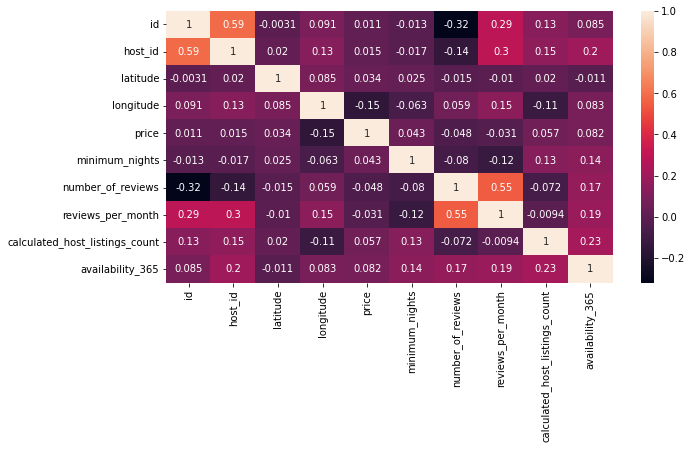

In [ ]:
#correlation in the data
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [ ]:
#find the number of records with each host_id
df["host_id"].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [ ]:
pd.notnull(df['reviews_per_month'])

0         True
1         True
2        False
3         True
4         True
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Name: reviews_per_month, Length: 48895, dtype: bool

In [ ]:
#find the number of columns with null value for each column
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## <b> Note :

## <b> The 'last_review' and 'reviews_per_month' have more than 10,000 null values,it affects outcomes of data analysis. So we removing these columns abd we are not doing any analysis on lattitude and longitude.

In [ ]:
#total number of null values in the dataset
df.isna().sum().sum()

20141

## <b> There are 4 columns with null values
  

*   name
*   host_name

*   last_review
*   reviews_per_month





In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
new_df = df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price','number_of_reviews', 
       'reviews_per_month','minimum_nights','calculated_host_listings_count',
       'availability_365']]
new_df.head(5)

## <b> What can we learn about different hosts and areas?

In [ ]:
#calculate_host_lisings for each neighbourhood group
hosts_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
kp=hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(8)
kp

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135


Text(0.5, 1.0, 'Hosts and Host listing count')

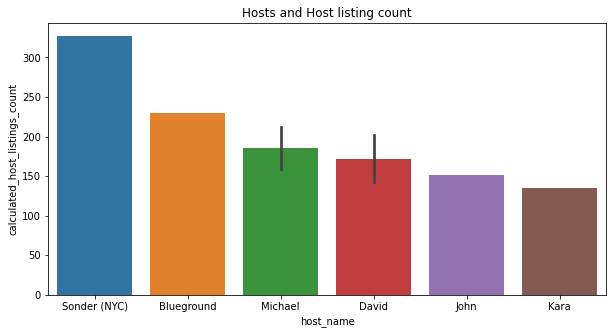

In [ ]:
#from the above analysis plotting using seaborn
plt.figure(figsize=(10,5))
sns.barplot(x=kp['host_name'],y=kp['calculated_host_listings_count'])
plt.title('Hosts and Host listing count')

## <b> What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
areas_reviews = new_df.groupby(['name','neighbourhood_group','price','minimum_nights'])['number_of_reviews'].count().reset_index()
price_reviews1 = areas_reviews.sort_values(by='price',ascending=False).head(100)
price_reviews1

,name,neighbourhood_group,price,minimum_nights,number_of_reviews
20219,Furnished room in Astoria apartment,Queens,10000,100,1
27223,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,10000,5,1
1112,1-BR Lincoln Center,Manhattan,10000,30,1
2224,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,9999,30,1
36152,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999,99,1
...,...,...,...,...,...
2628,5 Star Luxury 2 BR Suite Heart of Manhattan,Manhattan,2000,2,1
16204,Cozy bedroom in Brooklyn Sunsetpark,Brooklyn,2000,2,1
26931,Lower Park Avenue Pre War,Manhattan,2000,1,1
29995,NY Duplex Apartment in Flatiron,Manhattan,2000,7,1


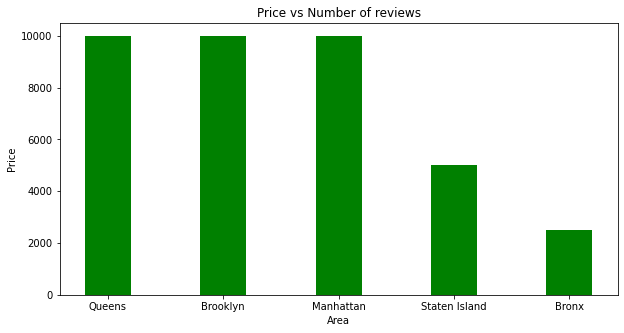

In [ ]:
area = price_reviews1['neighbourhood_group']
price = price_reviews1['price']

fig = plt.figure(figsize= (10,5))

#creating the bar plot
plt.bar(area,price , color ='green' , width = 0.4)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Number of reviews')
plt.show()

In [ ]:
#prices in different localities
price_reviews = areas_reviews.sort_values(by='number_of_reviews', ascending=False).head(100)
price_reviews

,name,neighbourhood_group,price,minimum_nights,number_of_reviews
22522,Hillside Hotel,Queens,135,1,12
26246,Loft Suite @ The Box House Hotel,Brooklyn,199,3,11
4619,Artsy Private BR in Fort Greene Cumberland,Brooklyn,48,30,10
22523,Hillside Hotel,Queens,165,1,5
23571,IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NAT...,Manhattan,175,30,5
...,...,...,...,...,...
32537,Perfect Upper West Side Studio,Manhattan,150,4,1
32491,Perfect Nolita apartment,Manhattan,182,2,1
32495,Perfect Place to Stay,Bronx,37,1,1
32533,Perfect UWS Apartment,Manhattan,175,1,1


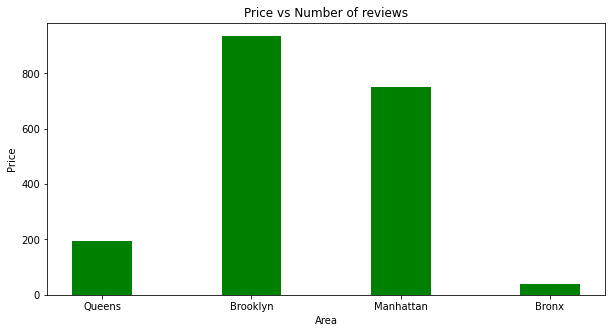

In [ ]:
area = price_reviews['neighbourhood_group']
price = price_reviews['price']

fig = plt.figure(figsize= (10,5))

#creating the bar plot
plt.bar(area,price , color ='green' , width = 0.4)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Number of reviews')
plt.show()

## <b> Which hosts are the busiest and why?

In [ ]:
busiest_hosts = new_df.groupby(['host_name','neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='minimum_nights',ascending=False).head(5)
busiest_hosts

,host_name,neighbourhood_group,room_type,minimum_nights
16549,Sonder (NYC),Manhattan,Entire home/apt,319
2295,Blueground,Manhattan,Entire home/apt,230
12299,Michael,Manhattan,Entire home/apt,143
9190,Kara,Manhattan,Entire home/apt,129
4128,David,Manhattan,Entire home/apt,117


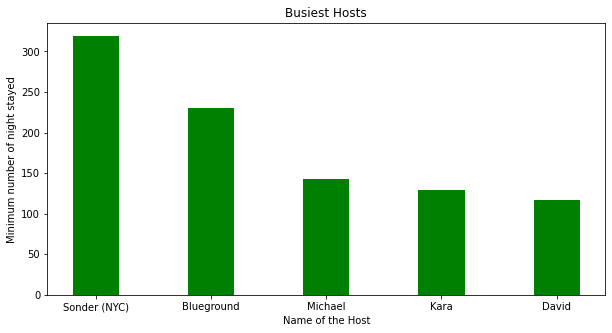

In [ ]:
name = busiest_hosts['host_name']
stayed = busiest_hosts['minimum_nights']

fig = plt.figure(figsize= (10,5))

#creating the bar plot
plt.bar(name,stayed, color='green', width = 0.4)

plt.xlabel('Name of the Host')
plt.ylabel('Minimum number of night stayed')
plt.title('Busiest Hosts')
plt.show()

## <b> Busiest hosts are :

## <b> 

1.  Sonder,
2.  Blueground,
3.Michael,
4.Kara,
5.David

## <b> Because these hosts are listing there place Manhattan which is most popular place according to our previous analysis and the room type Entire home/apt which is preferred by most number of people.

## <b> Is there any noticeable difference of traffic among different areas and what could be the reason for it?  

In [ ]:
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


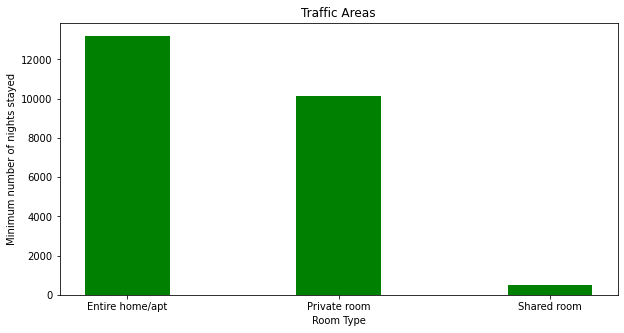

In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize= (10,5))

#creating the bar plot
plt.bar(room_type,stayed ,color='green', width=0.4)

plt.xlabel('Room Type')
plt.ylabel('Minimum number of nights stayed')
plt.title('Traffic Areas')
plt.show()

## <b> From the above Analysis We can say that the most people are preferring to stay Entire home/apt or Private room. There are very less number of people who are preferring to stay in Shared room.

## <b> Conclusion 

## <b> Firstly ,we have found host takes the good advantage of Airbnb platform, we found that our top host has 327 listings. After that we proceeded analyzing borought and neighborhood listing densities,areas were more popular than another.From our above analysis on Airbnb booking analysis, we coclude before the analysis went different as after getting result from the analysis.The entire EDA process gave facsinating result that wlii be helpful for the business developments and the expansions.

## <b> Thank You

   Rupali Sawant.



